In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Load the dataset
file_path = 'loan data/loan_approval_dataset.csv' 
data = pd.read_csv(file_path)

In [3]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
# Check for missing values
print(data.isnull().sum())

# Convert categorical columns to numerical values
data = pd.get_dummies(data, drop_first=True)

# Check data after cleansing
print(data.info())


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_id                    4269 non-null   int64
 1    no_of_dependents          4269 non-null   int64
 2    income_annum              4269 non-null   int64
 3    loan_amount               4269 non-null   int64
 4    loan_term                 4269 non-null   int64
 5    cibil_score               4269 non-null   int64
 6    residential_assets_value  4269 non-null

In [5]:
data.drop(columns = ['loan_id'], inplace = True)

In [6]:
data.columns

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' education_ Not Graduate',
       ' self_employed_ Yes', ' loan_status_ Rejected'],
      dtype='object')

In [7]:
data.columns = data.columns.str.strip()

In [8]:
data.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education_ Not Graduate',
       'self_employed_ Yes', 'loan_status_ Rejected'],
      dtype='object')

In [9]:
data

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,False,False,False
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,True,True,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,False,False,True
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,False,False,True
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,False,True,True
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,True,True,False
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,True,False,True
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,True,False,False


In [10]:
# Combine the values from multiple asset-related columns into a new 'Assets' column
data['Assets'] = (
    data['residential_assets_value'] + 
    data['commercial_assets_value'] + 
    data['bank_asset_value'] + 
    data['luxury_assets_value']
)

# Display the first few rows to verify the new column
print(data.head())


   no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                 2       9600000     29900000         12          778   
1                 0       4100000     12200000          8          417   
2                 3       9100000     29700000         20          506   
3                 3       8200000     30700000          8          467   
4                 5       9800000     24200000         20          382   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   2700000                  2200000              8800000   
2                   7100000                  4500000             33300000   
3                  18200000                  3300000             23300000   
4                  12400000                  8200000             29400000   

   bank_asset_value  education_ Not Graduate  self_employed_ Yes  \
0           8000000     

In [11]:
data

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected,Assets
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,False,False,False,50700000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,True,True,True,17000000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,False,False,True,57700000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,False,False,True,52700000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,True,True,True,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,False,True,True,7400000
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,True,True,False,20000000
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,True,False,True,39000000
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,True,False,False,28800000


In [12]:
data.drop(columns = ['commercial_assets_value', 'luxury_assets_value', 'residential_assets_value', 'bank_asset_value'], inplace = True) 

In [13]:
data

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected,Assets
0,2,9600000,29900000,12,778,False,False,False,50700000
1,0,4100000,12200000,8,417,True,True,True,17000000
2,3,9100000,29700000,20,506,False,False,True,57700000
3,3,8200000,30700000,8,467,False,False,True,52700000
4,5,9800000,24200000,20,382,True,True,True,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,False,True,True,7400000
4265,0,3300000,11300000,20,559,True,True,False,20000000
4266,2,6500000,23900000,18,457,True,False,True,39000000
4267,1,4100000,12800000,8,780,True,False,False,28800000


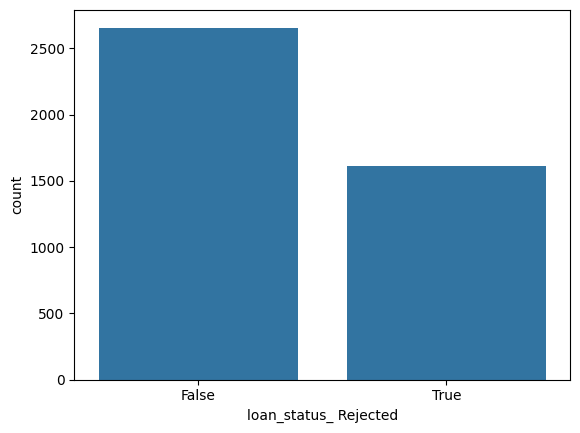

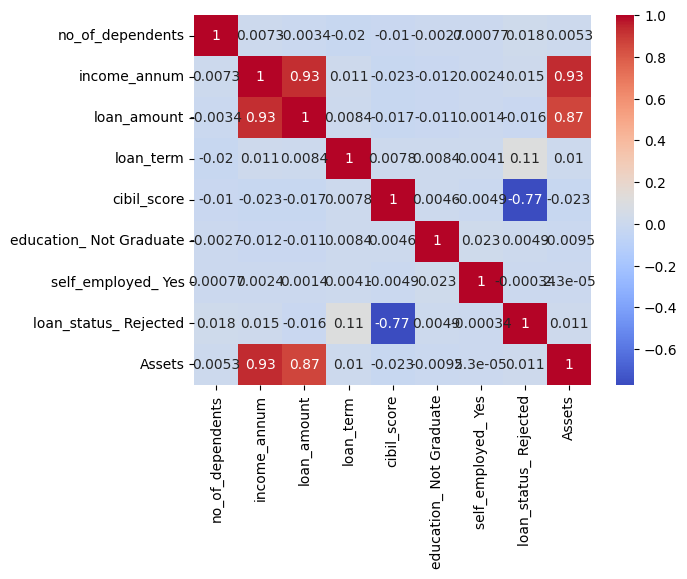

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
sns.countplot(x='loan_status_ Rejected', data=data)
plt.show()

# Check correlations between features
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [18]:
# Define the feature set (X) and the target variable (y)
x = data.drop('loan_status_ Rejected', axis=1)
y = data['loan_status_ Rejected']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
x

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,education_ Not Graduate,self_employed_ Yes,Assets
0,2,9600000,29900000,12,778,False,False,50700000
1,0,4100000,12200000,8,417,True,True,17000000
2,3,9100000,29700000,20,506,False,False,57700000
3,3,8200000,30700000,8,467,False,False,52700000
4,5,9800000,24200000,20,382,True,True,55000000
...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,False,True,7400000
4265,0,3300000,11300000,20,559,True,True,20000000
4266,2,6500000,23900000,18,457,True,False,39000000
4267,1,4100000,12800000,8,780,True,False,28800000


In [16]:
y

0       False
1        True
2        True
3        True
4        True
        ...  
4264     True
4265    False
4266     True
4267    False
4268    False
Name: loan_status_ Rejected, Length: 4269, dtype: bool

In [20]:
x_train.shape, x_test.shape

((3415, 8), (854, 8))

In [21]:
y_train.shape, y_test.shape

((3415,), (854,))

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Display the first few rows of the scaled training data
print(x_train_scaled.head())


   no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0          1.512508      1.009500     1.624772  -0.860003    -0.187401   
1         -1.435001      1.614171     2.077128   0.188894     0.637397   
2         -0.845499     -1.515891    -1.354157  -0.510371     0.474761   
3         -0.255997     -0.057566    -0.228784   1.237791     0.892968   
4          1.512508     -0.733375    -0.449445   0.188894    -0.925072   

   education_ Not Graduate  self_employed_ Yes    Assets  
0                 1.002639           -1.015047  0.601127  
1                 1.002639            0.985176  2.428704  
2                -0.997368           -1.015047 -1.313477  
3                -0.997368            0.985176  0.135274  
4                -0.997368            0.985176 -0.627496  


In [24]:
model = LogisticRegression()

In [25]:
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [28]:
model.score(x_test_scaled, y_test)

0.905152224824356

In [29]:
pred_data = pd.DataFrame([[3, 50000, 200000, 360, 750, 1, 0, 500000]],
                         columns=['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
                                  'cibil_score', 'education_ Not Graduate', 'self_employed_ Yes', 'Assets'])

# Preprocess the input data using the same StandardScaler fitted on the training data
pred_data_scaled = scaler.transform(pred_data)

# Make the prediction using the trained model
prediction = model.predict(pred_data_scaled)

# Output the prediction
print(f"Predicted Loan Approval Status: {'Approved' if prediction[0] == 1 else 'Not Approved'}")


Predicted Loan Approval Status: Approved


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
data

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected,Assets
0,2,9600000,29900000,12,778,False,False,False,50700000
1,0,4100000,12200000,8,417,True,True,True,17000000
2,3,9100000,29700000,20,506,False,False,True,57700000
3,3,8200000,30700000,8,467,False,False,True,52700000
4,5,9800000,24200000,20,382,True,True,True,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,False,True,True,7400000
4265,0,3300000,11300000,20,559,True,True,False,20000000
4266,2,6500000,23900000,18,457,True,False,True,39000000
4267,1,4100000,12800000,8,780,True,False,False,28800000


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[536   0]
 [318   0]]
              precision    recall  f1-score   support

       False       0.63      1.00      0.77       536
        True       0.00      0.00      0.00       318

    accuracy                           0.63       854
   macro avg       0.31      0.50      0.39       854
weighted avg       0.39      0.63      0.48       854



C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [38]:
import pickle as pk

In [39]:
pk.dump(model, open('model.pkl', 'wb'))
pk.dump(scaler, open('scaler.pkl', 'wb'))